In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)  

print("EDA - Customer Churn")

EDA - Customer Churn


In [3]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [9]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
df["Churn"].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

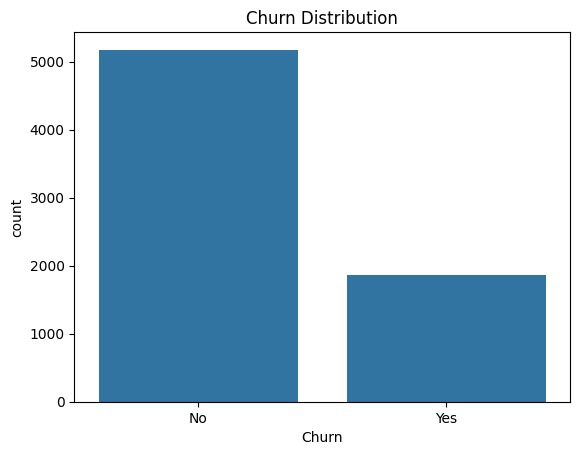

In [11]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [16]:
df["TotalCharges"].isna().sum()

np.int64(11)

In [17]:
df = df.dropna(subset=["TotalCharges"])

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


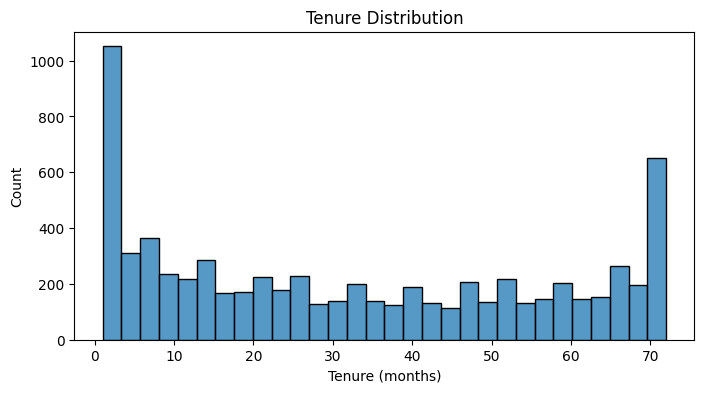

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df["tenure"], bins=30)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.show()

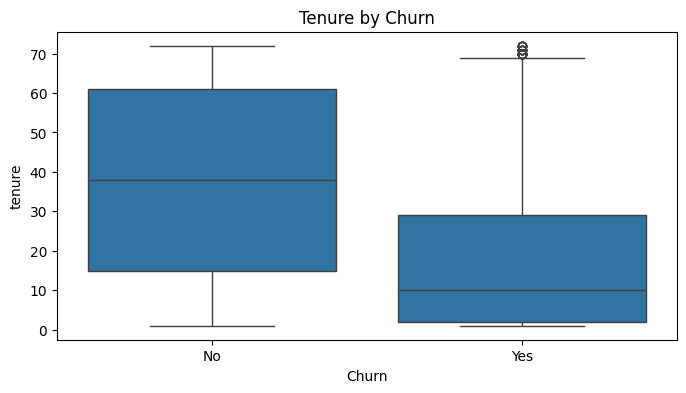

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure by Churn")
plt.show()

In [21]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64

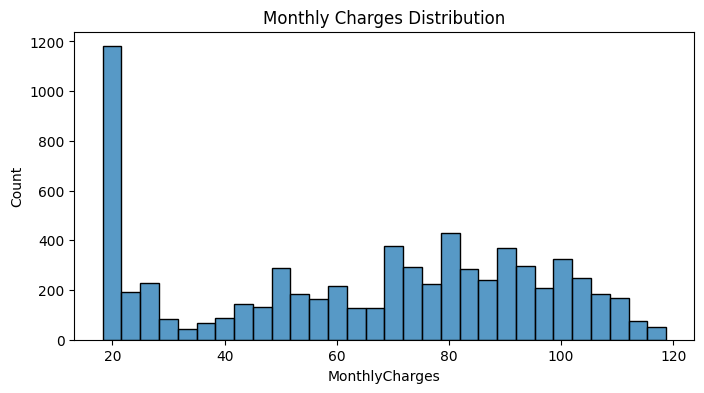

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df["MonthlyCharges"], bins=30)
plt.title("Monthly Charges Distribution")
plt.show()

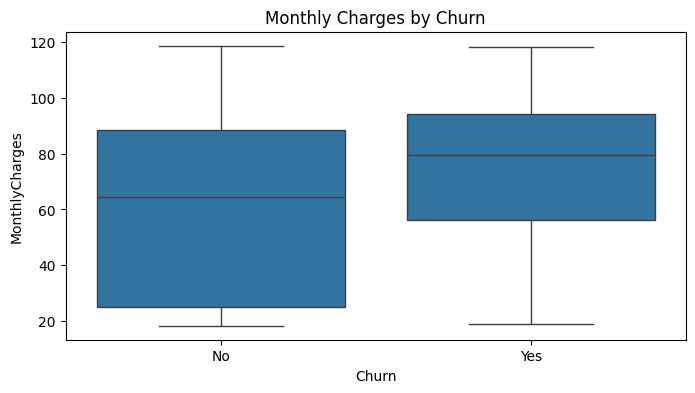

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges by Churn")
plt.show()

In [24]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [25]:
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

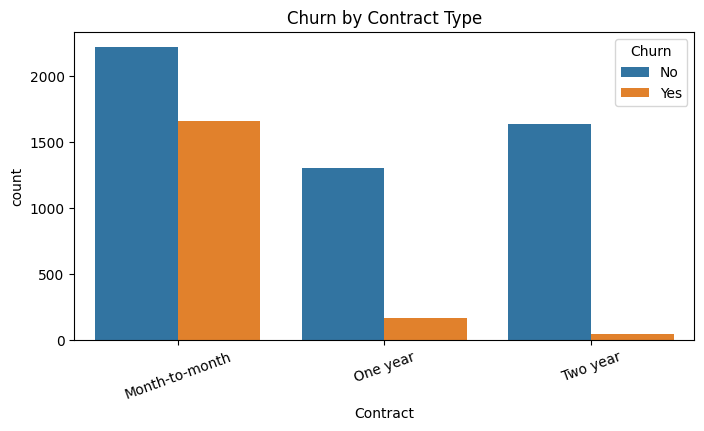

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()

In [27]:
(
    df.groupby("Contract")["Churn"]
      .value_counts(normalize=True)
      .rename("rate")
      .reset_index()
)

,Contract,Churn,rate
0,Month-to-month,No,0.572903
1,Month-to-month,Yes,0.427097
2,One year,No,0.887228
3,One year,Yes,0.112772
4,Two year,No,0.971513
5,Two year,Yes,0.028487


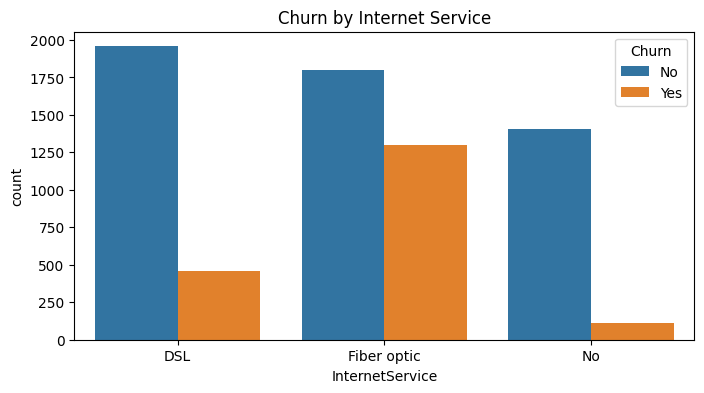

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Churn by Internet Service")
plt.show()

In [29]:
(
    df.groupby("InternetService")["Churn"]
      .value_counts(normalize=True)
      .rename("churn_rate")
      .reset_index()
)

,InternetService,Churn,churn_rate
0,DSL,No,0.810017
1,DSL,Yes,0.189983
2,Fiber optic,No,0.581072
3,Fiber optic,Yes,0.418928
4,No,No,0.925658
5,No,Yes,0.074342


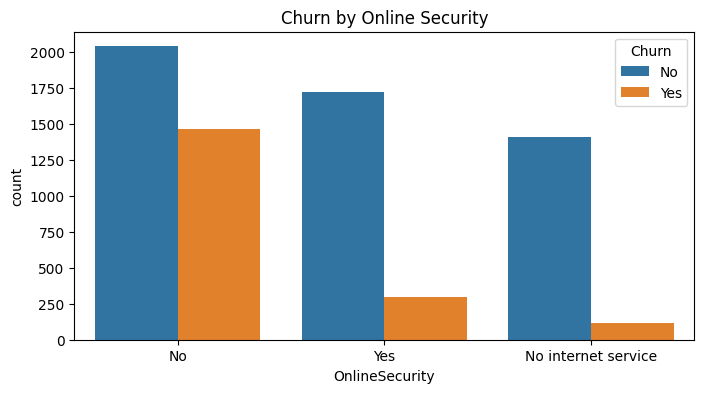

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="OnlineSecurity", hue="Churn")
plt.title("Churn by Online Security")
plt.show()

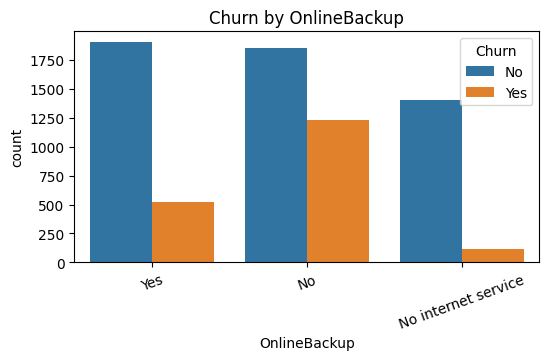

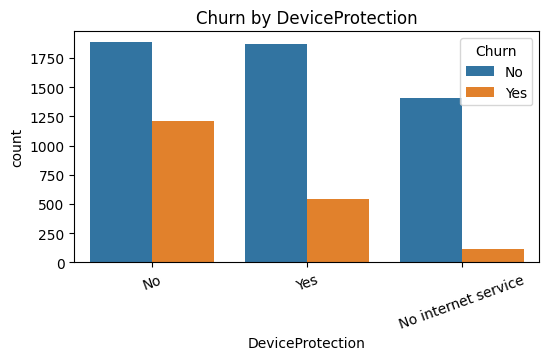

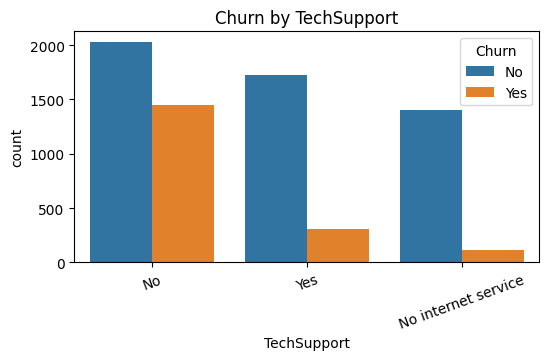

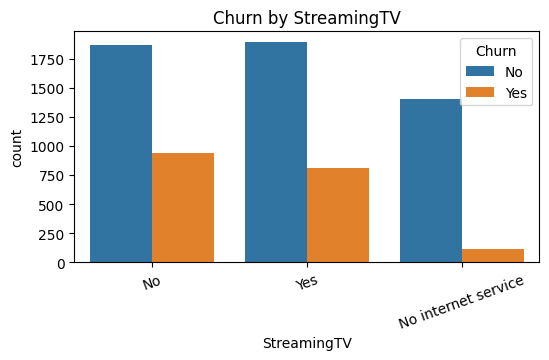

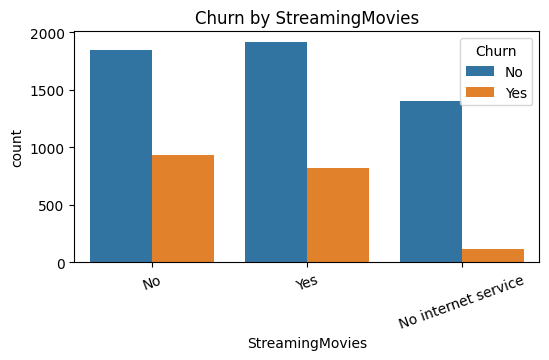

In [31]:
services = [
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

for service in services:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=service, hue="Churn")
    plt.title(f"Churn by {service}")
    plt.xticks(rotation=20)
    plt.show()

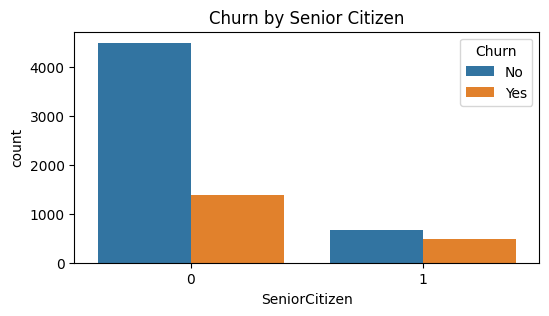

In [32]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.title("Churn by Senior Citizen")
plt.show()

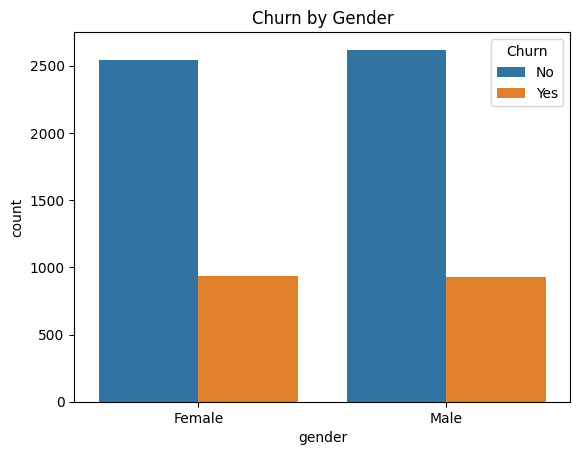

In [33]:
sns.countplot(data=df, x="gender", hue="Churn")
plt.title("Churn by Gender")
plt.show()

In [35]:
bi_df = df[[
    "customerID",
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "tenure",
    "Contract",
    "InternetService",
    "MonthlyCharges",
    "TotalCharges",
    "Churn"
]].copy()

bi_df["churn_flag"] = bi_df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

bi_df["tenure_group"] = pd.cut(
    bi_df["tenure"],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=["0-12", "13-24", "25-36", "37-48", "49-60", "61+"]
)

bi_df["monthly_charge_group"] = pd.cut(
    bi_df["MonthlyCharges"],
    bins=[0, 35, 70, 100, 200],
    labels=["Low", "Medium", "High", "Very High"]
)

In [39]:
bi_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,InternetService,MonthlyCharges,TotalCharges,Churn,churn_flag,tenure_group,monthly_charge_group
0,7590-VHVEG,Female,0,Yes,No,1,Month-to-month,DSL,29.85,29.85,No,0,0-12,Low
1,5575-GNVDE,Male,0,No,No,34,One year,DSL,56.95,1889.50,No,0,25-36,Medium
2,3668-QPYBK,Male,0,No,No,2,Month-to-month,DSL,53.85,108.15,Yes,1,0-12,Medium
3,7795-CFOCW,Male,0,No,No,45,One year,DSL,42.30,1840.75,No,0,37-48,Medium
4,9237-HQITU,Female,0,No,No,2,Month-to-month,Fiber optic,70.70,151.65,Yes,1,0-12,High


In [40]:
bi_df.info()

<class 'pandas.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   customerID            7032 non-null   str     
 1   gender                7032 non-null   str     
 2   SeniorCitizen         7032 non-null   int64   
 3   Partner               7032 non-null   str     
 4   Dependents            7032 non-null   str     
 5   tenure                7032 non-null   int64   
 6   Contract              7032 non-null   str     
 7   InternetService       7032 non-null   str     
 8   MonthlyCharges        7032 non-null   float64 
 9   TotalCharges          7032 non-null   float64 
 10  Churn                 7032 non-null   str     
 11  churn_flag            7032 non-null   int64   
 12  tenure_group          7032 non-null   category
 13  monthly_charge_group  7032 non-null   category
dtypes: category(2), float64(2), int64(3), str(7)
memory usage: 728.2 KB


In [42]:
bi_df.to_csv("../data/bi/churn_bi_dataset.csv", index=False)